Notes from Seb
* Use astroquery pacakge opensupernova catalog (SNE)
    * redshift: 0.2 - 0.4
    * type: 1A
    * If possible, query supernova also included in SNLS
* Use the supernova maximum time, convert to Julian date (note: ask about incorporating reach time into this)
* Query CADC data by position where time > max_time - 20 days and time < max_time + 100 days
* Take r-band images with the longest exposure time
* Plot the images
    * ~ 3 rows of 4 images
    * Label with JulianDate(ObservationDate - max_time)
    * Also get CFHT MegaPipe image that is way way before or way way after to show host galaxy without supernova
        * ALSO in the r band
        
* For SITELLE
    * https://github.com/sitelle-signals/workshop
        * Check out Dendrogram.ipynb, Extinction_M33_all.ipynb, Video from Cube .ipynb
        * https://signals.canfar.net to run data there
        * THEY USE PYTHON 2

# Imaging Supernova

In this notebook, we will image a distant supernova with a low redshift in different filters of CFHT Megaprime. To fetch data, we will use the  `astroquery`, which queries data provided by the [Canadian Astronomical Data Centre](http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca ).

## Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Setup](#2.-Setup)
* [3. Querying](#3.-Querying)
* [4. Fetching Data](#4.-Fetching-Data)
* [5. Plotting Results](#5.-Plotting-Results)

## 1. Introduction

The [Scolnic et al.](https://ui.adsabs.harvard.edu/abs/2018ApJ...859..101S/abstract) Supernova Catalog is one of the data products of the [Pan-STARRS Supernova (PS1 SN) Cosmology](https://archive.stsci.edu/prepds/ps1cosmo/) data release, it contains a list of supernova and their parameters such as position, redshifts, and light-curve shape. This tutorial will query this catalog for supernova with a low redshift. After selecting a supernova target, we query the CADC database for the target, then display some images.


## 2. Setup
This tutorial will go through some of the basic functionalities of the CADC module of the astroquery package. The CADC module is only available with the pre-release of the astroquery module, and can be installed using the command:
```
pip install --pre astroquery
```

Alternatively, you can clone and install from the source:

```
# If you have a github account:
git clone git@github.com:astropy/astroquery.git
# If you do not:
git clone https://github.com/astropy/astroquery.git
cd astroquery
python setup.py install
```
Note that these commands can also be done in a jupyter notebook by either declaring the code cell a bash cell by pasting `%%bash` at the top of the cell, or preceding each line with a `!`.
More information about astroquery can be found at the [astroquery github repository](https://github.com/astropy/astroquery).

Now, onto the tutorial!

## 3. Querying

### Find suitable target
For this tutorial, we want to display type Ia low redshift supernova and its host galaxy in the CFHT Legacy Survey field. To find a suitable supernova, we can query the [Open Supernova Catalog](https://sne.space/) then refine the results to get a list of supernova with `claimedtype` of `Ia` and `redshift` between `0.2` and `0.3` that are part of the Supernova Legacy Survey (SNLS) where the `discoverdate` is before the `maxdate`. The API for querying the catalog can be [found here](https://github.com/astrocatalogs/OACAPI).


In [20]:
from urllib.parse import urlencode
import pandas as pd

# We want results with claimedtype of Ia in csv format
# The `first` parameter means if there is a list of values for an object, only the first will be returned
params = {'claimedtype': 'Ia', 'format': 'csv', 'first': None }
catalog_domain = 'https://api.sne.space/catalog'
query_str = '&'.join(['{}={}'.format(key, value) if value else str(key) for key, value in params.items()])
url = '{}?{}'.format(catalog_domain, query_str)

# Grab the data from the url and convert to a pandas dataframe
sn_data = pd.read_csv(url)

# Define the min and max redshift range
z_min, z_max = 0.2, 0.3

# Select events that are SNLS supernova in redshift range, where discoverdate is before maxdate
sn_data = sn_data.dropna(subset=['discoverdate', 'maxdate', 'redshift'])
sn_data = sn_data[(sn_data['redshift'] > z_min) & (sn_data['redshift'] < z_max)]
sn_data = sn_data[sn_data['event'].str.startswith('SNLS')]
sn_data = sn_data[sn_data['discoverdate'] < sn_data['maxdate']]

print('Query url: {}'.format(url))
print('Number of results: {}'.format(len(sn_data)))
sn_data

Query url: https://api.sne.space/catalog?claimedtype=Ia&format=csv&first
Number of results: 7


,event,alias,catalog,claimedtype,dec,discoverdate,discoverer,download,ebv,host,...,name,photolink,ra,radiolink,redshift,references,sources,spectralink,velocity,xraylink
11227,SNLS-03D4cj,SNLS-03D4cj,sne,Ia,-17:42:16.76,2003/08/26,Supernova Legacy Project,NaN,0.0225,[HSP2005] J221606.66-174216.72,...,SNLS-03D4cj,"42,-10.3,60.4",22:16:06.627,NaN,0.2700,"2010A&A...523A...7G,2005ApJ...634.1190H,2008Ap...",NaN,"2,-6.69,-5.91",70000.0,NaN
11242,SNLS-04D1dc,SNLS-04D1dc,sne,Ia,-04:18:42.5,2004/08/10,NaN,NaN,0.0221,[NSB2006] J022618.47-041843.2,...,SNLS-04D1dc,"75,-3.24,120",02:26:18.40,NaN,0.2110,"2010A&A...523A...7G,2009A&A...507...85B,2016A&...",NaN,1,56700.0,NaN
11336,SNLS-05D1by,SNLS-05D1by,sne,Ia,-04:12:04.02,2005/09/02,NaN,NaN,0.0240,NaN,...,SNLS-05D1by,"34,-6.14,67.6",02:24:35.437,NaN,0.2990,"2010A&A...523A...7G,2008A&A...477..717B,2016A&...",NaN,"1,-1.15",76700.0,NaN
11348,SNLS-05D1hk,SNLS-05D1hk,sne,Ia,-04:38:03.31,2005/11/29,NaN,NaN,0.0210,NaN,...,SNLS-05D1hk,"37,-22.2,193",02:24:39.176,NaN,0.2631,"2010A&A...523A...7G,2009A&A...507...85B,2008Ap...",NaN,"2,-17.8",68780.0,NaN
11352,SNLS-05D1iy,SNLS-05D1iy,sne,Ia,-04:25:21.29,2005/11/29,NaN,NaN,0.0222,NaN,...,SNLS-05D1iy,"33,-10.5,46.3",02:27:39.961,NaN,0.2478,"2010A&A...523A...7G,2008ApJ...674...51E,2016A&...",NaN,"1,-6.01",65310.0,NaN
11409,SNLS-05D3kx,SNLS-05D3kx,sne,Ia,+53:08:13.63,2005/06/08,NaN,NaN,0.0093,[NSB2006] J142150.02+530813.4,...,SNLS-05D3kx,"42,-13.2,193",14:21:50.019,NaN,0.2190,"2010A&A...523A...7G,2006AJ....132.1126N,2016A&...",NaN,NaN,58600.0,NaN
11505,SNLS-06D3fp,SNLS-06D3fp,sne,Ia,+52:53:49.79,2006/06/17,NaN,NaN,0.0072,NaN,...,SNLS-06D3fp,"32,-18.3,29",14:20:18.605,NaN,0.2680,"2010A&A...523A...7G,2011MNRAS.410.1262W,2016A&...",NaN,"1,-1.97",69900.0,NaN


Now that we have a list of suitable supernovae, we can get the area and date range that we need to query the CADC database for. Let's choose the first result from the `sn_data` table and extract it's name, R.A., Dec., and date of the maximum observation. Using the R.A. and Dec. we can make a SkyCoord object, and using the maximum observation date, we can create a date window starting 20 days before and ending 100 days after to query inside of.

In [58]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time, TimeDelta

# Select a supernova and gather data
sn = sn_data.iloc[0]
sn_name, sn_ra, sn_dec, sn_maxdate = sn['name'], sn['ra'], sn['dec'], sn['maxdate']

# Build the SkyCoord object 
coords = SkyCoord(sn_ra, sn_dec, unit=(u.hourangle, u.deg))

# Build the start and end date objects
days_before = 20.0
days_after = 100.0
maxdate = Time(sn_maxdate.replace('/','-'), format='isot')
start_date = maxdate - TimeDelta(days_before, format='jd')
end_date = maxdate + TimeDelta(days_after, format='jd')

print('Supernova coordinates: {}'.format(coords))
print('Supernova max date: {}'.format(maxdate))
print('Query date range: {} to {}'.format(start_date, end_date))


Supernova coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (334.0276125, -17.70465556)>
Supernova max date: 2003-09-03T00:00:00.000
Query date range: 2003-08-14T00:00:00.000 to 2003-12-12T00:00:00.000



### Using ADQL
The CADC module has a `run_query` function which allows you to query the database using ADQL. It takes in a query and the run method (either `sync` or `async`) and returns a job which leads to the query results. In this tutorial, we want to query images that:
    - have been taken inbetween the `start_date` and `end_date` calculated above
    - contain the supernova coordinates
    - have the `r` band filter
    - have been collected by the Canada France Hawaii Telescope (CFHT)
    - have calibration level 2 or above
    - have `quality_flag` that is not junk

In addition to these results, we also want an image much after the supernova event has occurred, to give a good view of the host galaxy. So similarly, we will query the same coordinates, `r` filter, CFHT collection, etc, but the time the image is taken will be as new as possible.

Once we fetch the results, we will display a subset of the columns (since there are so many!) using the astropy table `show_in_notebook` method. First, let's start with the query...

In [59]:
from astroquery.cadc import Cadc

# Select the parameters for the ADQL query
query_params = {'num': '', 'mjd_start': start_date.mjd, 'mjd_end': end_date.mjd,
                'ra': coords.ra.degree, 'dec': coords.dec.degree,  
                'filter': 'r', 'collection': 'CFHT', 'cal_level': 2, 'order': 'ASC'}

# Build the query
query_outline = """SELECT {num} * FROM caom2.Plane AS Plane 
JOIN caom2.Observation AS Observation ON Plane.obsID = Observation.obsID
WHERE (INTERSECTS( INTERVAL( {mjd_start}, {mjd_end} ), Plane.time_bounds_samples ) = 1 
    AND CONTAINS( POINT('ICRS', {ra}, {dec}), Plane.position_bounds ) = 1 
    AND LOWER(Plane.energy_bandpassName) LIKE '{filter}%' 
    AND collection = '{collection}'
    AND calibrationLevel >= {cal_level}
    AND (Plane.quality_flag IS NULL OR Plane.quality_flag != 'junk'))
    ORDER BY time_bounds_lower {order}"""

# Instantiate the CADC module
cadc = Cadc()

# Run the query and fetch the results
job = cadc.run_query(query_outline.format(**query_params), 'sync')
results = job.get_results()

# Select a subset of columns to preview
columns_subset = [
    'productID', 'collection', 'energy_bandpassName', 'time_bounds_samples',
    'time_bounds_lower', 'time_exposure'
]

print('Number of results: {}'.format(len(results)))
results[columns_subset].show_in_notebook(display_length=5, show_row_index=False)

Number of results: 80


productID,collection,energy_bandpassName,time_bounds_samples,time_bounds_lower,time_exposure
,,,m,d,s
714734p,CFHT,r.MP9601,[[52873.4170719 52873.4212391801]],52873.4170719,360.05299999999994
714735p,CFHT,r.MP9601,[[52873.4227018 52873.426868906485]],52873.4227018,360.0380000000003
714736p,CFHT,r.MP9601,[[52873.4283271 52873.432494461114]],52873.4283271,360.05999999999995
714737p,CFHT,r.MP9601,[[52873.4340987 52873.43826614213]],52873.4340987,360.0669999999997
714738p,CFHT,r.MP9601,[[52873.4398189 52873.443986110644]],52873.4398189,360.0470000000003
715199p,CFHT,r.MP9601,[[52876.4295416 52876.43370898426]],52876.4295416,360.06199999999995
715200p,CFHT,r.MP9601,[[52876.4351466 52876.439313845374]],52876.4351466,360.04999999999984
715201p,CFHT,r.MP9601,[[52876.4407927 52876.44496006111]],52876.4407927,360.05999999999995
715202p,CFHT,r.MP9601,[[52876.4464284 52876.45059572639]],52876.4464284,360.0570000000002


In [60]:
from datetime import datetime

# Select the parameters for the ADQL query to get sn host galaxy much after event
# We select only one result where the start date is the end date of the previous query
query_params = {'num': 'TOP 1', 'mjd_start': end_date.mjd, 'mjd_end': Time(datetime.now(), format='datetime').mjd,
                'ra': coords.ra.degree, 'dec': coords.dec.degree,  
                'filter': 'r', 'collection': 'CFHTMEGAPIPE', 'cal_level': 2, 'order': 'DESC'}

# query_params = {'num': 'TOP 1', 'mjd_start': 0.0, 'mjd_end': start_date.mjd,
#                 'ra': coords.ra.degree, 'dec': coords.dec.degree,  
#                 'filter': 'r', 'collection': 'CFHTMEGAPIPE', 'cal_level': 2, 'order': 'ASC'}

# Run the query and fetch the results
job = cadc.run_query(query_outline.format(**query_params), 'sync')
recent_results = job.get_results()

recent_results[columns_subset]

productID,collection,energy_bandpassName,time_bounds_samples,time_bounds_lower,time_exposure
,,,m,d,s
bytes64,bytes32,bytes32,object,float64,float64
QD4.07BQ10.R,CFHTMEGAPIPE,r.MP9601,[[54444.216558 54445.247345518525]],54444.216558,1499.0


## 4. Fetching Data
Now let's get access to the results, download them, and display them. We will use the `get_data_urls` function to actually access the data. We also want to calculate the time difference between the time the image was captured and the supernova maximum date and append both the access url and time from max date to the results table.

In [61]:
from astropy.table import vstack

# Reduce results for easier displaying
interval = len(results) // 12

# Stack supernova and host galaxy results
results_subset = vstack([results[::interval], recent_results])

# Calculate the time from maxdate for each result
time_from_maxdate = [col_date - maxdate.mjd for col_date in results_subset['time_bounds_lower']]
results_subset['time_from_maxdate'] = time_from_maxdate

# Fetch the data access urls
urls = cadc.get_data_urls(results_subset)
results_subset['url'] = urls

results_subset[columns_subset + ['time_from_maxdate', 'url']].show_in_notebook(display_length=5, show_row_index=False)

productID,collection,energy_bandpassName,time_bounds_samples,time_bounds_lower,time_exposure,time_from_maxdate,url
,,,m,d,s,,
714734p,CFHT,r.MP9601,[[52873.4170719 52873.4212391801]],52873.4170719,360.05299999999994,-11.582928099996934,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/714734p.fits.fz?RUNID=f3c9ngl43w4ti62a
715200p,CFHT,r.MP9601,[[52876.4351466 52876.439313845374]],52876.4351466,360.04999999999984,-8.564853399999265,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/715200p.fits.fz?RUNID=hwz0jig35hl8ly06
715714p,CFHT,r.MP9601,[[52880.4486178 52880.45278518426]],52880.4486178,360.06199999999995,-4.5513821999993525,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/715714p.fits.fz?RUNID=awpqi5kzfdbzgype
716131p,CFHT,r.MP9601,[[52885.5080244 52885.51219172639]],52885.5080244,360.0570000000002,0.5080243999982486,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/716131p.fits.fz?RUNID=tcf7aafxvzng80s8
718506p,CFHT,r.MP9601,[[52900.4276717 52900.431838956945]],52900.4276717,360.05099999999993,15.427671700002975,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/718506p.fits.fz?RUNID=oxfxf9ecslc0tsan
718770p,CFHT,r.MP9601,[[52904.3819039 52904.386071006484]],52904.3819039,360.0380000000003,19.381903900000907,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/718770p.fits.fz?RUNID=pzl2fw7gw5pqsjcl
719290p,CFHT,r.MP9601,[[52908.339006 52908.34317329167]],52908.339006,360.05400000000003,23.339006000001973,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/719290p.fits.fz?RUNID=recfvd45g5954gek
720371p,CFHT,r.MP9601,[[52916.2730536 52916.277221146294]],52916.2730536,360.0760000000003,31.27305360000173,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/720371p.fits.fz?RUNID=kgwy8qvjqpl7ooqv
723377p,CFHT,r.MP9601,[[52930.3200302 52930.32419771157]],52930.3200302,360.07300000000015,45.320030199996836,https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/723377p.fits.fz?RUNID=pzcjjuq4d31xip4l


The urls give access to the actual data, so now we can fetch the file, get data to calculate a cutout, open it with the astropy fits module, and display an image!

### Retriving Data with Astropy.io
With the urls, we can now download the data, but the data might be large and we are actually only interested in a small part around the supernova. We thus want to donwload a 2D cutout around the target that we want to look at, rather than the whole FITS file. There are many different methods to perform a cutout, but today we will add the cutout region string to the parameter in the request and use the `caom2ops/cutout` CADC web service. More information about requesting CADC data can be found [in the documentation](http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/doc/data/).

In [62]:
import re
from astropy.wcs import WCS
from astropy.io import fits
import warnings


def get_cutout_image_data(url, ra, dec, radius=0.01, ext=0, verbose=False):
    """Given a data url and coordinates, returns the image data and wcs 
    coordinate data of a fits file at the given extension, cutout around the url"""

    uri = 'ad:' + \
        re.findall(
            "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/(.+)\?RUNID=", url)[0]

    cutout_region_string = 'Circle ICRS {ra} {dec} {radius}'.format(
        ra=ra, dec=dec, radius=radius)
    params_dict = {'uri': uri, 'cutout': cutout_region_string}

    base_url = 'https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/caom2ops/cutout'

    url_params = urlencode(params_dict)
    data_url = '{}?{}'.format(base_url, url_params)
    try:
        with fits.open(data_url, ignore_missing_end=True) as hdulist:
            if verbose:
                hdulist.info()
            w = WCS(hdulist[ext].header)
            image_data = hdulist[ext].data
        return {'image_data': image_data, 'wcs': w}
    except:
        print('Error: Problem with {}'.format(data_url))
        return None

# Supress fits processing warnings
warnings.simplefilter('ignore')

data_list = [{**get_cutout_image_data(result['url'], coords.icrs.ra.degree, coords.icrs.dec.degree),
              'time_from_maxdate' : result['time_from_maxdate']}
 for result in results_subset]


## 5. Plotting Results

Now that we have all the image data, we can begin to plot the data! First we clean the data and remove any bunk images.

In [63]:
import numpy as np

def clean_image_list(data_list):
    """Cleans out the incomplete and ill-formatted images and returns the datalist, 
    with a max length of ncap"""
    def exists(data):
        image_data = data['image_data']

    def percent_nonzero_above_99(data):
        image_data = data['image_data']
        return np.count_nonzero(image_data) / image_data.size > 0.95

    def square_image(data):
        x, y = data['image_data'].shape
        return (x / y < 1.2 and x / y > 0.8)

    # Clean the images on number of nonzero pixels and aspect ratio
    cleaned_data_list = [data for data in data_list if data['image_data'] is not None]
    cleaned_data_list = list(filter(percent_nonzero_above_99, cleaned_data_list))
    cleaned_data_list = list(filter(square_image, cleaned_data_list))
    return cleaned_data_list


cleaned_data_list = clean_image_list(data_list)
print('Final number of cleaned images: {}'.format(len(cleaned_data_list)))

Final number of cleaned images: 15


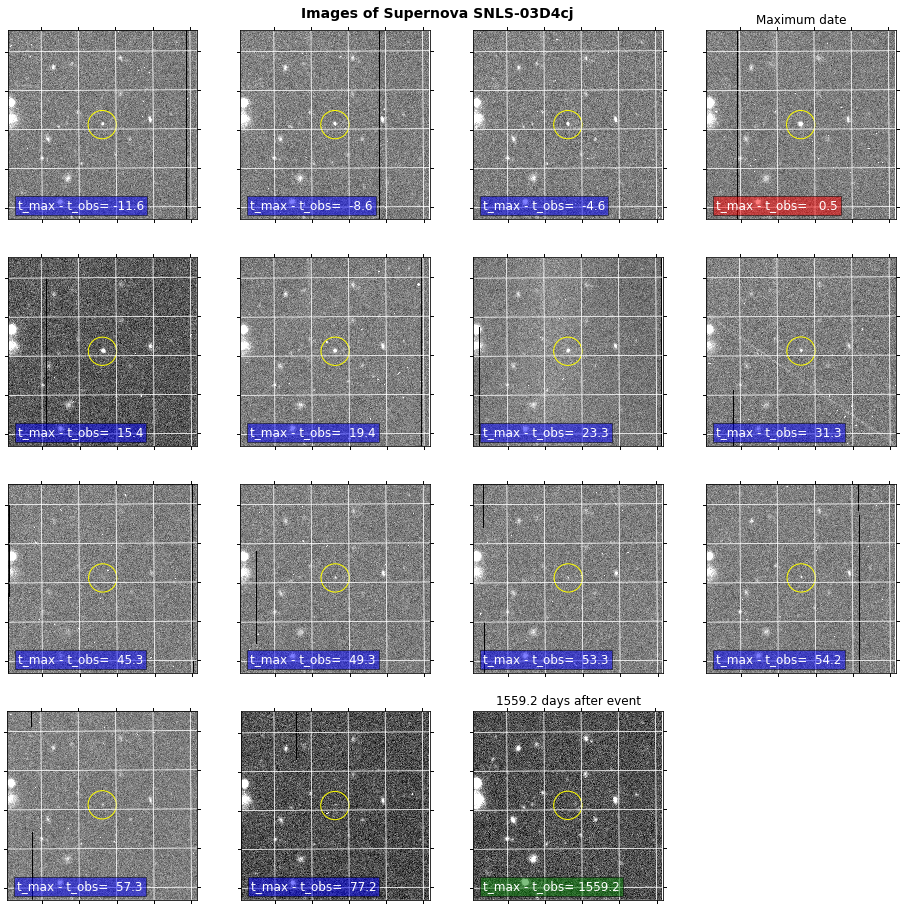

In [67]:
%matplotlib inline
import math
import matplotlib
import matplotlib.pyplot as plt
from astropy.visualization import LinearStretch, ImageNormalize, ZScaleInterval

np.seterr(divide='ignore', invalid='ignore')
#TODO: Put all on same axes
def plot_image_list(data_list, coords, sn_name, geo=None):
    """ Plot the quasar image list"""
    
    # Build a layout if none is passed in
    if geo is None:
        geo = (len(data_list), 1)  # ncols, nrows

    # Dynamically create figsize based on layout
    fig = plt.figure(figsize=(geo[0] * 4, geo[1] * 4))
    fig.suptitle('Images of Supernova {}'.format(sn_name), fontsize=14, fontweight='bold', y=0.9)
    
    brightest_date = min([abs(data['time_from_maxdate']) for data in data_list])
    dimmest_date = max([abs(data['time_from_maxdate']) for data in data_list])
    wcs_trans = data_list[0]['wcs']

    for idx, data in enumerate(data_list):
        ax = plt.subplot(geo[1], geo[0], idx + 1, projection=wcs_trans, facecolor='y')
        
        # Draw yellow circle around supernova position
        ax.scatter(coords.icrs.ra.degree,
                   coords.icrs.dec.degree,
                   transform=ax.get_transform('icrs'),
                   s=800,
                   edgecolor='yellow',
                   facecolor='none')
        image_data_norm = ImageNormalize(data['image_data'],
                                         interval=ZScaleInterval(),
                                         stretch=LinearStretch())
        ax.imshow(data['image_data'], norm=image_data_norm, transform=ax.get_transform(data['wcs']), cmap='gray')

        # Print data to max lum
        color = 'blue'
        if data['time_from_maxdate'] == brightest_date:
            ax.set_title('Maximum date')
            color = 'red'
        elif data['time_from_maxdate'] == dimmest_date:
            ax.set_title('{:5.1f} days after event'.format(data['time_from_maxdate']))
            color = 'green'            
            
        ax.text(20, 20, 't_max - t_obs= {:5.1f}'.format(data['time_from_maxdate']), fontsize=12, color='white',
                bbox={'facecolor': color, 'alpha': 0.5, 'pad': 3 })
        ax.coords.grid(color='white', ls='solid')
        ra, dec = ax.coords['ra'], ax.coords['dec']
        ra.set_ticklabel_visible(False)
        dec.set_ticklabel_visible(False)
        ra.set_axislabel('')
        dec.set_axislabel('')


ncols = 4
nrows = math.ceil(len(cleaned_data_list) / ncols)
plot_image_list(cleaned_data_list, coords, sn_name, geo=(ncols, nrows))

In [ ]:
def plot_image_list_shared_axes(data_list, geo=None):
    if geo is None:
        geo = (1, len(data_list)) #nrows, ncols
        
    fig = plt.figure(figsize=(20,10))
    wcs_trans = data_list[1][1]
    image_data_trans = data_list[1][0]
    for idx, image in enumerate(data_list):
        image_data, wcs = image[0], image[1]
        image_data_norm = ImageNormalize(image_data, interval=PercentileInterval(99), stretch=LinearStretch())
        ax = plt.subplot(geo[0], geo[1], idx+1, projection=wcs_trans)
        ax.set_xlim(-0.5, image_data_trans.shape[1] - 0.5)
        ax.set_ylim(-0.5, image_data_trans.shape[0] - 0.5)
        ax.imshow(image_data, transform=ax.get_transform(wcs), norm=image_data_norm, cmap='gray')
        ax.grid(color='white', ls='solid')
    plt.xlabel('Galactic Longitude')
    plt.ylabel('Galactic Latitude')

plot_image_list_shared_axes(data_list)

@ARTICLE{2018ApJ...859..101S,
   author = {{Scolnic}, D.~M. and {Jones}, D.~O. and {Rest}, A. and {Pan}, Y.~C. and 
	{Chornock}, R. and {Foley}, R.~J. and {Huber}, M.~E. and {Kessler}, R. and 
	{Narayan}, G. and {Riess}, A.~G. and {Rodney}, S. and {Berger}, E. and 
	{Brout}, D.~J. and {Challis}, P.~J. and {Drout}, M. and {Finkbeiner}, D. and 
	{Lunnan}, R. and {Kirshner}, R.~P. and {Sanders}, N.~E. and 
	{Schlafly}, E. and {Smartt}, S. and {Stubbs}, C.~W. and {Tonry}, J. and 
	{Wood-Vasey}, W.~M. and {Foley}, M. and {Hand}, J. and {Johnson}, E. and 
	{Burgett}, W.~S. and {Chambers}, K.~C. and {Draper}, P.~W. and 
	{Hodapp}, K.~W. and {Kaiser}, N. and {Kudritzki}, R.~P. and 
	{Magnier}, E.~A. and {Metcalfe}, N. and {Bresolin}, F. and {Gall}, E. and 
	{Kotak}, R. and {McCrum}, M. and {Smith}, K.~W.},
    title = "{The Complete Light-curve Sample of Spectroscopically Confirmed SNe Ia from Pan-STARRS1 and Cosmological Constraints from the Combined Pantheon Sample}",
  journal = {\apj},
archivePrefix = "arXiv",
   eprint = {1710.00845},
 keywords = {cosmology: observations, dark energy, supernovae: general},
     year = 2018,
    month = jun,
   volume = 859,
      eid = {101},
    pages = {101},
      doi = {10.3847/1538-4357/aab9bb},
   adsurl = {https://ui.adsabs.harvard.edu/abs/2018ApJ...859..101S},
  adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}

